In [ ]:
# Analysis:
#
# Of the four drug regimens, Capomulin and Ramicane had the smallest average tumor volume and therefore 
# were the most effective drugs in this study. 
# 
# Looking at mouse l509 comfirms a reduction in tumor size over time. 
# 
# The correlation between mouse weight and tumor size is significant, indicating that if the mouse weighs in higher, 
# then it is likely it's tumor is growing in volume as well. 
# 
# The difference between male and female mice does not appear to hold any significance to the study. 


In [157]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [158]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [159]:
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [160]:
combined_df["Mouse ID"].nunique()

249

In [161]:
dup_mice_id = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice_id


array(['g989'], dtype=object)

In [162]:
duplicate_df = combined_df.loc[combined_df["Mouse ID"]== "g989", :]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [163]:
clean_df = combined_df[combined_df["Mouse ID"].isin(dup_mice_id)== False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [164]:
clean_df["Mouse ID"].nunique()

248

In [165]:
mean_tumor_vol = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_tumor_vol = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var_tumor_vol = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sd_tumor_volume = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sample_tumor_volume = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


In [166]:
tumor_volume_df = pd.DataFrame({"mean": mean_tumor_vol, "median": median_tumor_vol, "var": var_tumor_vol, "std": sd_tumor_volume, "sem": sample_tumor_volume})
tumor_volume_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [167]:
tumor_volume_df.agg

<bound method DataFrame.aggregate of                    mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398>

In [168]:
mouse_count = clean_df['Drug Regimen'].value_counts()
mouse_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice Tested')

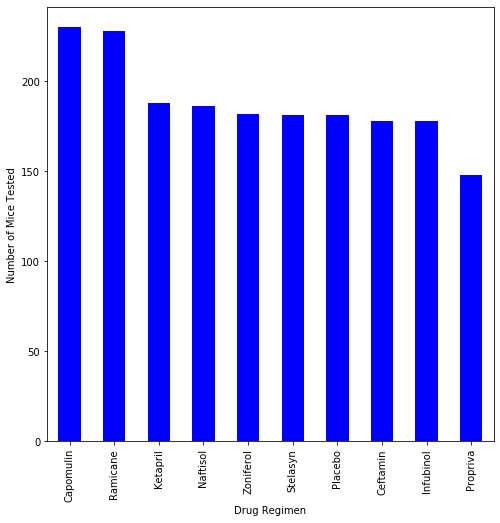

In [169]:
pd_plot = mouse_count.plot(kind="bar", figsize=(8,8), color='b')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

In [170]:
x_axis = mouse_count.index.values
y_axis = mouse_count.values


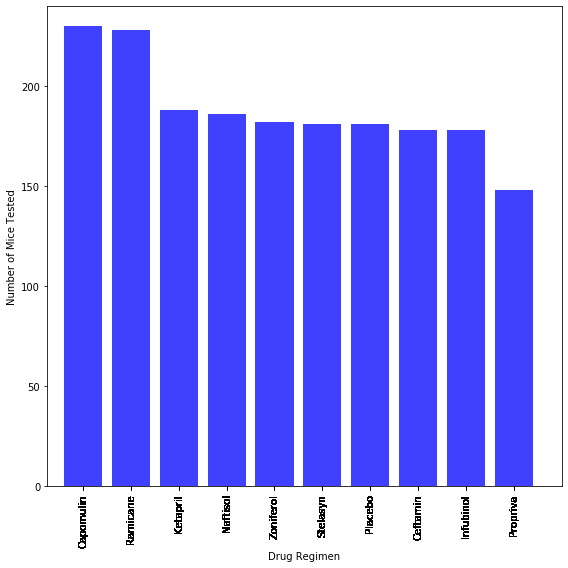

In [171]:
plt.figure(figsize=(8,8))
plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mouse_count)+ 10)
plt.xticks(clean_df["Drug Regimen"], rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.tight_layout()
plt.show()

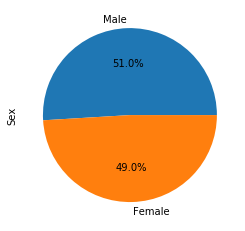

In [83]:
mouse_sex = clean_df["Sex"].value_counts()
pd_pie = mouse_sex.plot(kind="pie", autopct= "%1.1f%%")
plt.show()

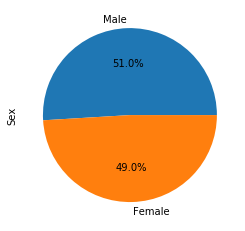

In [87]:
labels = ['Female', 'Male']
sizes = [49.0, 51.0]
plot_pie = mouse_sex.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

In [108]:
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]

In [90]:
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, clean_df, on=("Mouse ID", "Timepoint"), how="left")
capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [110]:
max_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()

In [111]:
merged_data = max_timepoint.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")
merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [127]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_vol_list = []

In [128]:
for drug in treatments:
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    final_tumor_vol_list.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound)
                                  | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


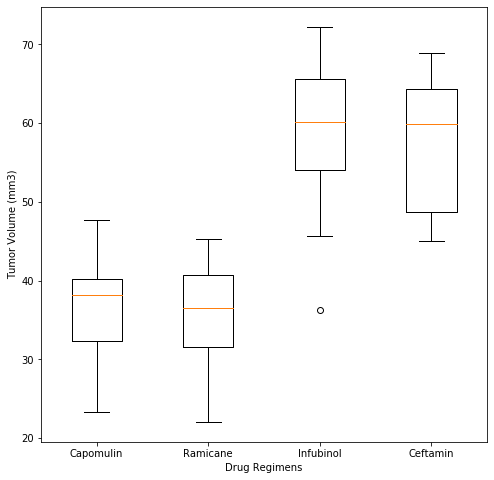

In [137]:
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimens')
ax1.boxplot(final_tumor_vol_list)
ax1.set_xticklabels(treatments)
plt.show()

In [133]:
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]
line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


Text(0, 0.5, 'Tumor Volume (mm3)')

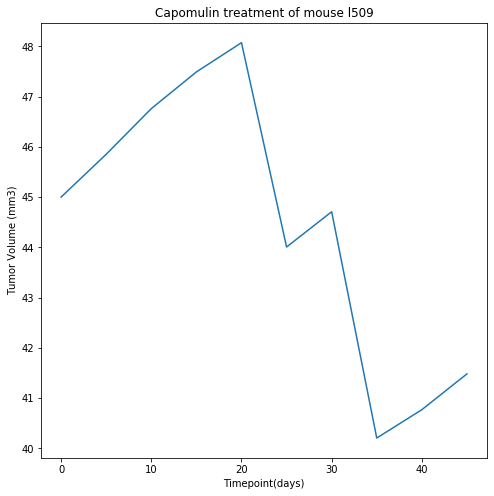

In [136]:
fig1, ax1 = plt.subplots(figsize=(8,8))
plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')

In [138]:
avg_capo_vol = capomulin_df.groupby(['Mouse ID']).mean()
avg_capo_vol.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


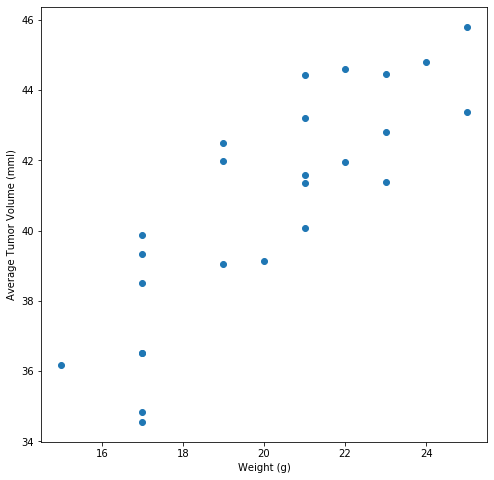

In [146]:
fig1, ax1 = plt.subplots(figsize=(8,8))
x_values = avg_capo_vol['Weight (g)']
y_values = avg_capo_vol["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mml)')
plt.show()

In [145]:
correlation = st.pearsonr(avg_capo_vol['Weight (g)'], avg_capo_vol['Tumor Volume (mm3)'])

print(f"The correlation between mouse weight and tumor volume is {round(correlation[0],2)}")
                                                                        
                                                                        

The correlation between mouse weight and tumor volume is 0.84


In [150]:
(slope, intercept, rvalue, pvalue, stdrr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64


In [154]:
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

y = 0.95x +21.55


The r-value is: 0.7088568047708721


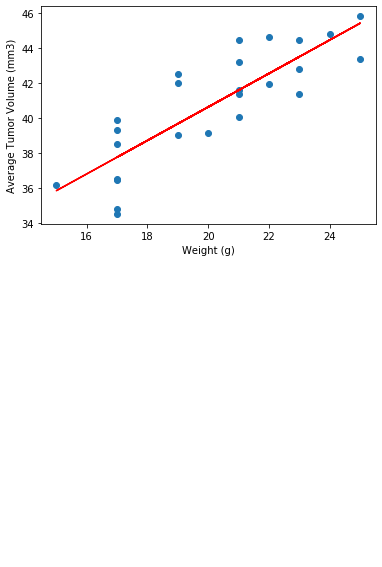

In [155]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq,(20,15), fontsize=15,color="r")
print(f"The r-value is: {rvalue**2}")
plt.show()